# Grammy Winners and Nominees from 1965 to 2024

In [68]:
import pandas as pd

GW = pd.read_csv("grammy_winners.csv")
print(GW['winner'].value_counts())
GW

winner
False    20491
True      4879
Name: count, dtype: int64


,year,annual_edition,category,artist,producers,song_or_album,winner,url
0,2024,67,Best Boxed Or Special Limited Edition Package,"Nick Azinas & Mike Hicks, art directors (Alpha...",NaN,Half Living Things,False,https://www.grammy.com/awards/67th-annual-gram...
1,2024,67,Best Instrumental Composition,NaN,Strands,Strands,True,https://www.grammy.com/awards/67th-annual-gram...
2,2024,67,Best Opera Recording,"John Adams, conductor; Paul Appleby, Julia Bul...",NaN,Adams: Girls Of The Golden West,False,https://www.grammy.com/awards/67th-annual-gram...
3,2024,67,Best Classical Instrumental Solo,Andy Akiho,NaN,Akiho: Longing,False,https://www.grammy.com/awards/67th-annual-gram...
4,2024,67,Best Classical Solo Vocal Album,NaN,Beyond The Years - Unpublished Songs Of Floren...,Beyond The Years - Unpublished Songs Of Floren...,True,https://www.grammy.com/awards/67th-annual-gram...
...,...,...,...,...,...,...,...,...
25365,1958,1,Best Performance By An Orchestra,George Shearing,NaN,Burnished Brass (Album),False,https://www.grammy.com/awards/1st-annual-gramm...
25366,1958,1,Best Performance By A Dance Band,Count Basie,NaN,Basie,True,https://www.grammy.com/awards/1st-annual-gramm...
25367,1958,1,Best Performance By A Dance Band,Warren Covington And Tommy Dorsey Orcehstra,NaN,Tea For Two Cha Cha,False,https://www.grammy.com/awards/1st-annual-gramm...
25368,1958,1,Best Performance By A Dance Band,Ray Anthony,NaN,Peter Gunn,False,https://www.grammy.com/awards/1st-annual-gramm...


### Rensa data

In [3]:
import pandas as pd
GW = pd.read_csv("grammy_winners.csv")

# Visa kolumnnamn
print("Kolumner i GW:\n", GW.columns)

# Visa antal True/False i 'winner' före rensning
print("\nAntal före rensning:")
print(GW['winner'].value_counts())

# Visa antal NaN i varje kolumn
print("\nAntal NaN per kolumn:")
print(GW.isnull().sum())

# Rensa rader där 'category', 'artist' eller 'song_or_album' är NaN (men inte 'producers')
GW.dropna(subset=['category', 'artist', 'song_or_album'], inplace=True)

# Ta bort dubbletter baserat på de viktigaste kolumnerna
GW.drop_duplicates(subset=['year', 'category', 'artist', 'song_or_album'], inplace=True)

# Visa antal True/False i 'winner' efter rensning
print("\nAntal efter rensning:")
print(GW['winner'].value_counts())

# Visa total antal rader efter rensning
print("\nAntal rader efter rensning:", len(GW))


Kolumner i GW:
 Index(['year', 'annual_edition', 'category', 'artist', 'producers',
       'song_or_album', 'winner', 'url'],
      dtype='object')

Antal före rensning:
winner
False    20491
True      4879
Name: count, dtype: int64

Antal NaN per kolumn:
year                  0
annual_edition        0
category              0
artist             2726
producers         22331
song_or_album        22
winner                0
url                   0
dtype: int64

Antal efter rensning:
winner
False    19619
True      3025
Name: count, dtype: int64

Antal rader efter rensning: 22644


### Antal vinster per år 

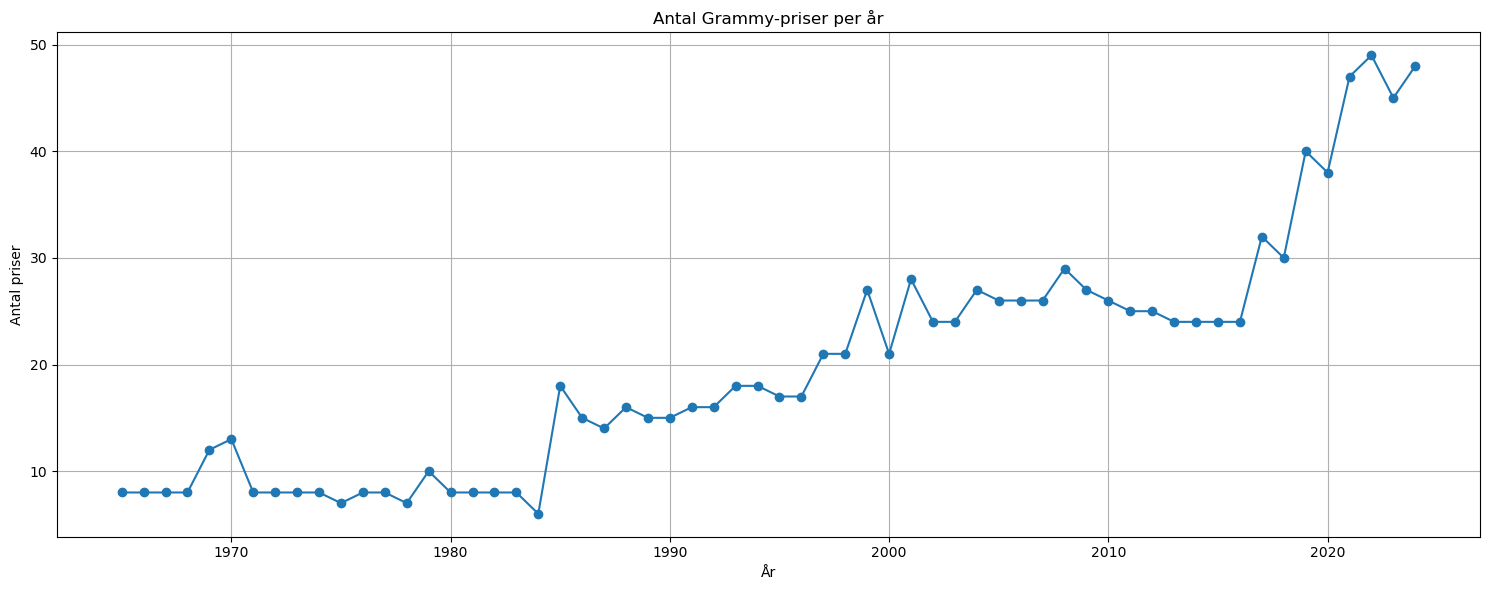

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Räkna antalet priser per år
awards_per_year = GW['year'].value_counts().sort_index()

# Rita diagrammet
plt.figure(figsize=(15, 6))
plt.plot(awards_per_year.index, awards_per_year.values, marker='o')
plt.title('Antal Grammy-priser per år')
plt.xlabel('År')
plt.ylabel('Antal priser')
plt.grid(True)
plt.tight_layout()
plt.show()

### Artist med flest grammy awards

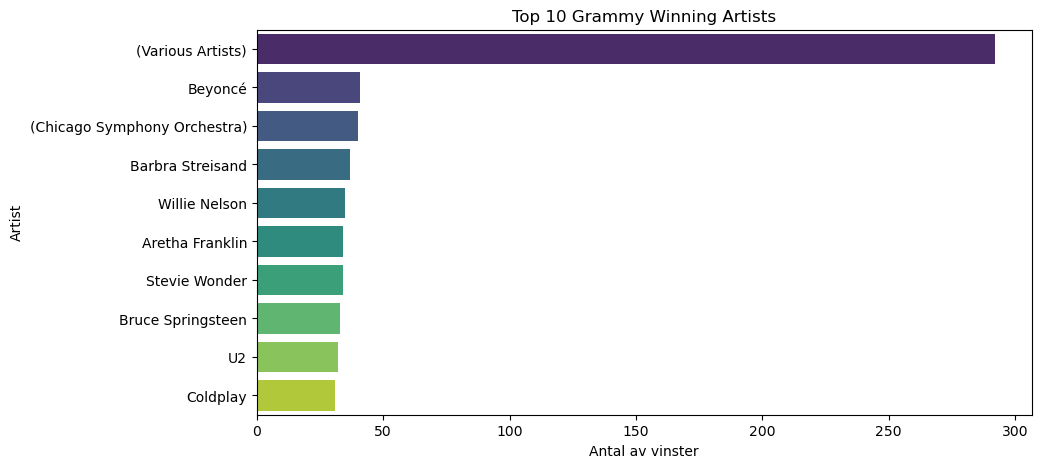

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

top_artists = GW['artist'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_artists.values,
    y=top_artists.index,
    hue=top_artists.index,
    palette="viridis",
    legend=False
)
plt.title("Top 10 Grammy Winning Artists")
plt.xlabel("Antal av vinster")
plt.ylabel("Artist")
plt.show()


### Populära kategorier 

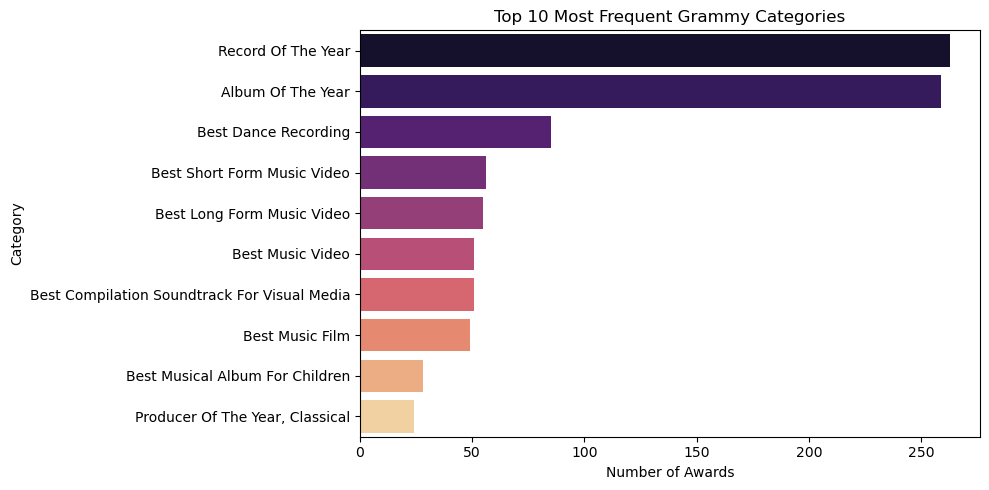

In [15]:
top_categories = GW['category'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    hue=top_categories.index,
    palette="magma",
    legend=False
)
plt.title("Top 10 Most Frequent Grammy Categories")
plt.xlabel("Number of Awards")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Modell Classifiction

### Importera några bibliotek, som kan behövas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


### Välj features och target

In [91]:
features = GW_clean[["year", "category_encoded", "artist_encoded"]]
labels = GW_clean["winner"]

GW_clean

,year,annual_edition,category,artist,song_or_album,winner,category_encoded,artist_encoded
0,2024,67,Best Boxed Or Special Limited Edition Package,"Nick Azinas & Mike Hicks, art directors (Alpha...",Half Living Things,0,59,8823
2,2024,67,Best Opera Recording,"John Adams, conductor; Paul Appleby, Julia Bul...",Adams: Girls Of The Golden West,0,421,6072
3,2024,67,Best Classical Instrumental Solo,Andy Akiho,Akiho: Longing,0,86,858
5,2024,67,Best Choral Performance,"Elaine Kelly, conductor; Melissa Attebury, Ste...",Sheehan: Akathist,0,71,3834
6,2024,67,Best Contemporary Classical Composition,"Andrea Casarrubios, composer (Andrea Casarrubios)",Casarrubios: Seven For Solo Cello,0,156,816
...,...,...,...,...,...,...,...,...
25364,1958,1,Best Recording For Children,Shari Lewis And Lambchop,Fun In Shariland (Album),0,499,10589
25365,1958,1,Best Performance By An Orchestra,George Shearing,Burnished Brass (Album),0,445,4531
25366,1958,1,Best Performance By A Dance Band,Count Basie,Basie,1,440,2777
25367,1958,1,Best Performance By A Dance Band,Warren Covington And Tommy Dorsey Orcehstra,Tea For Two Cha Cha,0,440,12264


### Gör det till tränings och test data

In [85]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


### Skapa och träna en modell

In [84]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Testa modellen

In [89]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.8551556635018768,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.98      0.92      3925\n           1       0.31      0.07      0.12       604\n\n    accuracy                           0.86      4529\n   macro avg       0.59      0.52      0.52      4529\nweighted avg       0.80      0.86      0.81      4529\n')